## PROBLEM TEARDOWN
We are given dataset of house prices with some features like no of bathrooms,no of bedrooms etc.

Our task is to create a model which will predict the price for any new house by looking at its features


## QUESTION TO ASK
business objective and end goal ?
- use this model to predict house prices in a given area and invest in the area if it is undervalued
how does the current situation look like?



## Finding the type of model to build
- supervised,unsupervised,reinforcement learning
- classification or regression
- batch learning or online learning techniques

## SELECTING A PERFORMANCE MEASURE
- ROOT MEAN SQUARE ERROR
- MEAN ABSOLUTE ERROR,MANHATTAN NORM
( FOR REGRESSION , TYPICALLY WE USE RMSE)

## CHECKING THE ASSUMPTIONS
- for ex: he should make sure that the team needs price and not the categories like expensive,cheap etc

In [1]:
cd "C:\Users\LENOVO1\OneDrive\Desktop\PLACEMENTS\MACHINE LEARNING"

C:\Users\LENOVO1\OneDrive\Desktop\PLACEMENTS\MACHINE LEARNING


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
housing=pd.read_csv("housing.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
housing.dropna(axis=1,inplace=True)

In [6]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# NO MISSING DATA
# ALL ATTRIBUTES ARE WELL DEFINED WRT DATA TYPES

In [9]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [10]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# %matplotlib inline


In [12]:
# housing.hist(bins=100, figsize=(10,10))
# plt.show()

### TEST SET(explicit)

In [13]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
# train_set, test_set=split_train_test(housing,0.2)

In [15]:
# print(f"rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

rows in train set: 404
Rows in test set: 102


In [17]:
# since CHAS feature has only 2 values : 0 and 1
# so we will perform stratified selection so that values of 0 and 1
# distributes uniformly in train and test data
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [21]:
housing=strat_train_set.copy()

## LOOKING FOR CORRELATIONS

In [22]:
# making a correlation matrix
corr_matrix=housing.corr()  

In [23]:
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.212927  0.416640 -0.061482  0.430879 -0.257375  0.361890   
ZN      -0.212927  1.000000 -0.542161 -0.023536 -0.509327  0.293363 -0.565680   
INDUS    0.416640 -0.542161  1.000000  0.043686  0.759051 -0.382255  0.644114   
CHAS    -0.061482 -0.023536  0.043686  1.000000  0.077490  0.100082  0.058388   
NOX      0.430879 -0.509327  0.759051  0.077490  1.000000 -0.300178  0.727358   
RM      -0.257375  0.293363 -0.382255  0.100082 -0.300178  1.000000 -0.241281   
AGE      0.361890 -0.565680  0.644114  0.058388  0.727358 -0.241281  1.000000   
DIS     -0.386900  0.666939 -0.708612 -0.088081 -0.763623  0.206304 -0.734827   
RAD      0.648221 -0.306480  0.580908 -0.023005  0.596012 -0.199079  0.449489   
TAX      0.603934 -0.322803  0.716288 -0.048802  0.659049 -0.281568  0.501491   
PTRATIO  0.305603 -0.390570  0.384465 -0.132682  0.164977 -0.329010  0.259633   
B       -0.486869  0.188575 

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

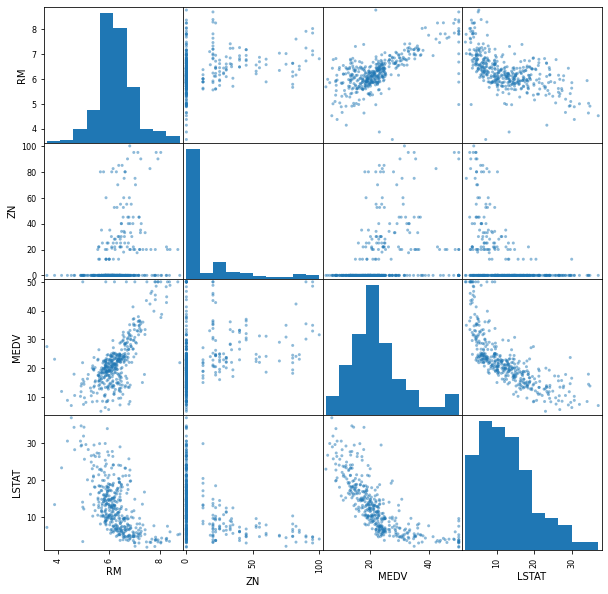

In [25]:
from pandas.plotting import scatter_matrix
attributes=["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(10,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

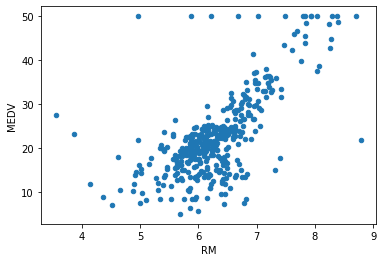

In [26]:
housing.plot(kind='scatter',x='RM',y='MEDV')

In [27]:
# OUTSIDE POINTS ARE OUTLIERS

## TRYING OUT ATTRIBUTE COMBINATIONS

In [28]:
# tax per room
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [30]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

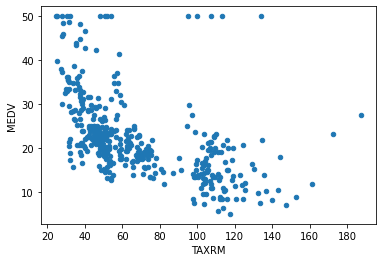

In [31]:
housing.plot(kind='scatter',x="TAXRM",y="MEDV")

In [32]:
housing= strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

### MISSING ATTRIBUTES


In [33]:
# To take care of missing attributes, you have three options:
#     1. to get rid of missing data points
#     2. to get rid of the whole attribute
#     3. set the value to some value(0,mean or median)

In [34]:
# option 1
# housing.dropna(subset=["RM"])
# option 2
# housing.drop("RM", axis=1

In [35]:
# option 3
RM=housing["RM"].sort_values()
RM=RM.sort_values()
RM.reset_index(drop=True,inplace=True)
# finding median of RM
def median(RM):
    count=RM.count()
    if count%2==0:
        median_idx=int(count/2)-1
        median=RM[median_idx]
    else:
        median_idx=int((count+1)/2)-1
        median=RM[median_idx]
    return median,median_idx
print(median(RM))

(6.209, 201)


In [36]:
med=housing["RM"].median()

In [37]:
print(med)

6.21


In [38]:
RM

0      3.561
1      3.863
2      4.138
3      4.368
4      4.519
       ...  
399    8.297
400    8.375
401    8.398
402    8.704
403    8.780
Name: RM, Length: 404, dtype: float64

In [39]:
# housing["RM"].fillna(median)
# filling median in null entries


In [40]:
# FILLING THIS MEDIAN VALUE IN TRAIN AND TEST DATA SET IF IN CASE THERE 
# ARE NULL VALUES

In [41]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [43]:
# X= imputer.transform(housing) is an numpy array
# THIS WOULD FILL ALL THE MISSING VALUES WITH THEIR MEDIAN RESPECTIVELY

In [44]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

Primarily , two types of feature scaling methods:
1. Min_max scaling   (Normalization)
  (value - min)/(max - min) - tone down values to same scale
  sklearn provides class called MinMaxScaler for this
2. Standardization
  (value - mean)/std
  sklearn provides a class called standard scaler for this
  makes the variance 1

## Creating a pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [46]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [47]:
housing_num_tr
# is a numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## selecting a desired model 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [49]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

##  Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [51]:
lin_rmse

1.20392010482917

very huge error
so we can see that linearregression is not a best fit model for this problem

lets check another algorithm - desiciontreeregressor

### Using better evaluation technique- CROSS VALIDATION

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,
                      scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [53]:
rmse_scores

array([2.77761691, 2.7037204 , 4.46495012, 2.55140477, 3.32966328,
       2.61720432, 4.53717898, 3.33624962, 3.15062195, 3.12482393])

In [54]:
# clearly decisiontree is better fit for this model

In [55]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [56]:
print_scores(rmse_scores)

Scores:  [2.77761691 2.7037204  4.46495012 2.55140477 3.32966328 2.61720432
 4.53717898 3.33624962 3.15062195 3.12482393]
Mean:  3.259343427814008
Standard Deviation:  0.676862146675536


##  saving the model

In [57]:
import joblib
from joblib import dump, load

In [58]:
dump(model,'Boston_Housing.joblib')

['Boston_Housing.joblib']

## Testing the model on test data

In [61]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

In [62]:
final_rmse

2.99871618281858

In [63]:
print(final_predictions, list(Y_test))

[25.22  11.333 25.354 21.503 18.617 14.814 19.804 14.523 31.994 41.896
 19.818 12.008 23.777 27.667 19.576 10.889 31.44  14.437 23.575 18.821
 19.82  17.827 18.508 22.422 19.049 31.055 16.141 32.791  8.773 33.16
 23.425 21.387 22.991 10.797 20.563 11.771 43.751 24.273 23.546 41.347
 24.258 30.148 20.12  20.911 18.916 33.358 44.639 20.103 19.889 21.935
 21.563 14.764 20.981 14.618 25.59  32.906 41.729 29.212 19.429 20.938
 47.163 10.138 19.631 25.211 15.004 33.649 19.913 17.941 18.95  33.974
 25.863 22.822 21.741 22.677 34.87  13.49  16.167 20.205 20.597 21.448
 22.433 20.858 13.962 22.202 20.849 21.376 14.09  21.325 21.791 23.286
 18.315 27.489  7.4   25.993 18.76  28.91  19.722 31.457 14.218 27.107
 20.981 20.272] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [65]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [66]:
from joblib import load
import numpy as np
model=load('Boston_Housing.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.122141041, -1.31238772,  2.61111401, -6.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.885])